# Where is my money coming from and going to??



Why I choose this Dataset?
Abbreviations:
F.I.R.E

Financial 
Independence
Retire 
Early

In [64]:
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
import os
from datetime import datetime

In [65]:
%matplotlib inline

In [66]:
plt.rcParams['figure.figsize'] = (10, 5)

In [67]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [68]:
if os.path.isfile("statement.csv"):
    filepath = "statement.csv"
    print("loading from file")

where_money = pd.read_csv(filepath,parse_dates=[0], dayfirst=True)
print("done")

loading from file
done


# 1. Understanding my Data

In [69]:
where_money.head(10)

,Date,Credit,Debit,Transaction,Balance
0,2021-07-01,NaN,-13.99,AMAZON MKTPLC AU SYDNEY SOUTH NS AUS Card xx96...,98.98
1,2021-07-01,NaN,-10.13,AMAZON MKTPLC AU SYDNEY SOUTH NS AUS Card xx96...,112.97
2,2021-07-01,NaN,-8.80,AMAZON MKTPLC AU SYDNEY SOUTH NS AUS Card xx96...,123.10
3,2021-06-30,NaN,-8.86,AMAZON MKTPLC AU SYDNEY SOUTH NS AUS Card xx96...,131.90
4,2021-06-24,NaN,-24.00,Transfer To Cheuk Chi Ho CommBank App jess lunch,140.76
5,2021-06-24,NaN,-22.35,HUNGRY JACKS BASS HILL BASS HILL AU AUS Card x...,164.76
6,2021-06-24,NaN,-20.07,7-ELEVEN 2272 RYDE NS AUS Card xx9617 Value Da...,187.11
7,2021-06-23,NaN,-9.90,MCDONALDS DURAL DURAL NSWAU,207.18
8,2021-06-23,NaN,-202.30,CANDLE SUPPLY PTY WETHERILL PAR NS AUS Card xx...,217.08
9,2021-06-22,NaN,-31.86,PAYPAL *ENEBA 4029357733 AU AUS Card xx9617 Va...,419.38


In [70]:
where_money.columns

Index(['Date', 'Credit', 'Debit', 'Transaction', 'Balance'], dtype='object')

In [71]:
where_money.index

RangeIndex(start=0, stop=1068, step=1)

In [72]:
row = where_money.iloc[5]
print(row)

Date                                         2021-06-24 00:00:00
Credit                                                       NaN
Debit                                                     -22.35
Transaction    HUNGRY JACKS BASS HILL BASS HILL AU AUS Card x...
Balance                                                   164.76
Name: 5, dtype: object


In [73]:
row["Debit"]
row.Debit

-22.35

In [74]:
where_money["Credit"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1063   NaN
1064   NaN
1065   NaN
1066   NaN
1067   NaN
Name: Credit, Length: 1068, dtype: float64

In [75]:
where_money.Debit.sum()

-98914.27

In [76]:
where_money.set_index("Date").groupby(pd.Grouper(freq="1M")).sum().Debit

Date
2019-07-31    -7349.36
2019-08-31    -5131.30
2019-09-30     -409.67
2019-10-31   -12255.96
2019-11-30    -6351.68
2019-12-31    -1510.25
2020-01-31    -2205.48
2020-02-29   -16686.38
2020-03-31    -5375.89
2020-04-30     -616.68
2020-05-31      -98.33
2020-06-30    -5374.06
2020-07-31    -2108.89
2020-08-31    -1841.35
2020-09-30    -3550.25
2020-10-31    -2193.98
2020-11-30    -1696.18
2020-12-31    -7392.25
2021-01-31    -1474.79
2021-02-28    -5876.65
2021-03-31     -910.22
2021-04-30     -669.57
2021-05-31     -993.10
2021-06-30    -6809.08
2021-07-31      -32.92
Freq: M, Name: Debit, dtype: float64

In [77]:
def list_reverer():
    revers_list = this_list
    revers_list.reverse()
    return revers_list

In [78]:
def sum_function():
    plus_list = []
    cumsum = 0
    for x in list2sum:
        cumsum += x
        plus_list.append(cumsum)
    return plus_list

# 2. Overall Transactions

In [79]:
def Debit_Credit_account():
    debit_by_m = where_money.set_index("Date").groupby(pd.Grouper(freq="1M")).sum().Debit.abs()
    debit_by_m.plot(style = ".-").set(xlabel="Date", ylabel="AUD($)",title = "Debit and Credit of my account for the past 2 years")
    credit_by_m = where_money.set_index("Date").groupby(pd.Grouper(freq="1M")).sum().Credit
    credit_by_m.plot(style = ".-")

    date_bye = debit_by_m.idxmax() #.idxmax
    bye = int(debit_by_m.loc[date_bye])
    plt.annotate(f"${bye} debit", (date_bye, bye))
    date_hi = credit_by_m.idxmax() #.idxmax
    hi = int(credit_by_m.loc[date_hi])
    plt.annotate(f"${hi} credit", (date_hi, hi))
    plt.legend()
    plt.grid(True)

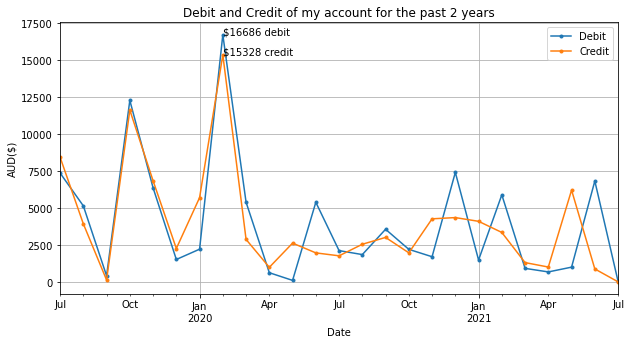

In [80]:
Debit_Credit_account()

Text(0, 0.5, 'Frequency')

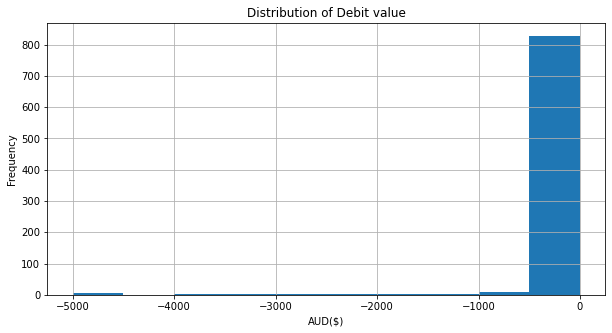

In [81]:
where_money["Debit"].hist()
plt.title("Distribution of Debit value")
plt.xlabel("AUD($)")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

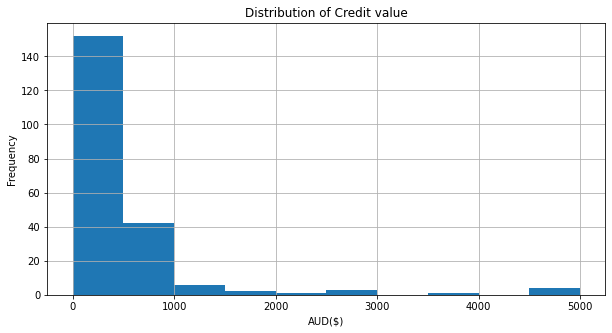

In [82]:
where_money["Credit"].hist()
plt.title("Distribution of Credit value")
plt.xlabel("AUD($)")
plt.ylabel("Frequency")

# 3. Dive into the deeds

In [83]:
def money_movement_feb():
    money_feb = where_money[(where_money.Date > '2020-02') & (where_money.Date < '2020-03')]
    money_feb.set_index("Date").groupby(pd.Grouper(freq="1D")).sum().Debit.abs().plot(style='.-').set(xlabel="Date", ylabel="AUD ($)",title = "Money Movement (2020/02)")
    money_feb.set_index("Date").groupby(pd.Grouper(freq="1D")).sum().Credit.plot(style='.-')
    plt.legend(["Debit", "Credit"])
    plt.grid(True)

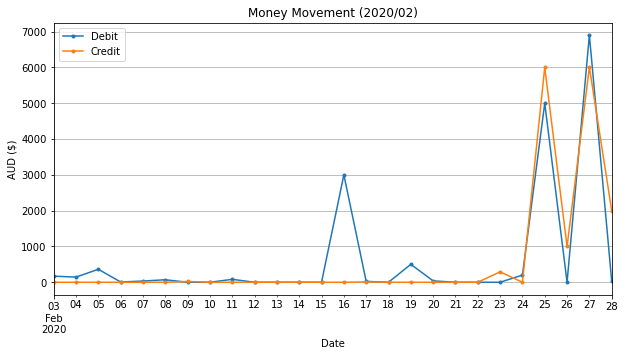

In [84]:
money_movement_feb()

In [85]:
money_feb = where_money[(where_money.Date > '2020-02') & (where_money.Date < '2020-03')]
money_feb[(money_feb.Date > '2020-02-23') & (money_feb.Date < '2020-02-29')]

,Date,Credit,Debit,Transaction,Balance
723,2020-02-28,1000.00,NaN,Transfer from LAI YAN NetBank fm Mum Value Dat...,4057.68
724,2020-02-28,NaN,-10.00,ARC AT UNSW LTD KENSINGTON AU Card xx3506,3057.68
725,2020-02-28,NaN,-5.50,BEEM IT BEEM.COM.AU AU Card xx3506,3067.68
726,2020-02-28,1000.00,NaN,Transfer from LAI YAN NetBank fm Mum,3073.18
727,2020-02-28,NaN,-5.50,BEAN CODE CHATSWOOD NS AUS Card xx3506 Value D...,2073.18
728,2020-02-28,NaN,-10.88,COLES 0852 CHATSWOOD AU AUS Card xx3506 Value ...,2078.68
729,2020-02-27,NaN,-1900.00,Transfer to xx9392 CommBank app,2089.56
730,2020-02-27,NaN,-5000.00,Transfer to other Bank CommBank app stonk,3989.56
731,2020-02-27,5000.00,NaN,Transfer from xx9392 CommBank app,8989.56
732,2020-02-27,1000.00,NaN,Transfer from LAI YAN NetBank fm Mum,3989.56


In [86]:
def money_movement_feb_cleaned():
    money_feb_Trans = money_feb.Transaction.str.upper()
    money_feb_notran = money_feb[~money_feb_Trans.str.contains("TRANSFER")]
    money_feb_notran.set_index("Date").groupby(pd.Grouper(freq="1D")).sum().Debit.abs().plot(style = ".-").set(xlabel="Date", ylabel="AUD ($)",title = "Money Movement - No Self Transaction (2020/02)")
    money_feb_notran.set_index("Date").groupby(pd.Grouper(freq="1D")).sum().Credit.plot(style = ".-")
    plt.legend(["Debit", "Credit"])
    plt.grid(True)

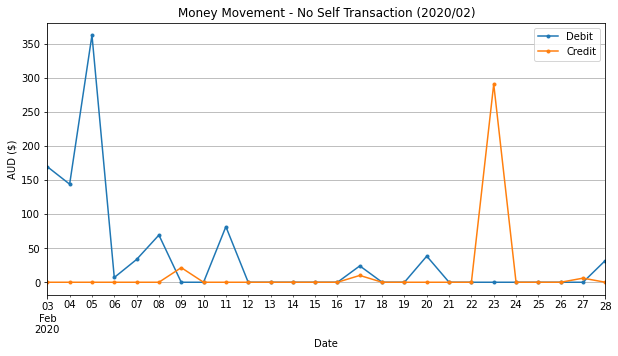

In [87]:
money_movement_feb_cleaned()

In [88]:
money_feb_Trans = money_feb.Transaction.str.upper()
money_feb_notran = money_feb[~money_feb_Trans.str.contains("TRANSFER")]
feb_words = Counter()
money_feb_word_count = money_feb_notran.Transaction.str.upper().str.split().apply(feb_words.update)
print(feb_words)


Counter({'VALUE': 31, 'DATE:': 31, 'CARD': 22, 'XX3506': 22, 'INTERNATIONAL': 14, 'FEE': 14, 'TRANSACTION': 13, 'TH': 12, 'PHUKET': 11, 'THA': 11, 'THB': 11, '06/02/2020': 8, 'AU': 7, '30/01/2020': 6, 'AUS': 5, 'GRABTAXI': 4, '(THAILAND)': 4, 'CO': 4, 'BANGKOK': 4, '05/02/2020': 4, '02/02/2020': 4, 'BEEM': 3, 'IT': 3, 'BEEM.COM.AU': 3, 'NS': 3, 'DIRECT': 3, 'CREDIT': 3, '04/02/2020': 3, 'THE': 3, 'ROYAL': 3, 'PARADISE': 3, 'HOT': 3, 'UNSW': 2, 'KENSINGTON': 2, 'CHATSWOOD': 2, '26/02/2020': 2, '001248': 2, 'CTRLINK': 2, 'YTH': 2, 'ALL': 2, '17/02/2020': 2, 'SINGAPORE': 2, 'SG': 2, 'SGP': 2, 'SGD': 2, 'LAGUNA': 2, '29/01/2020': 2, 'ATM': 2, 'ARC': 1, 'AT': 1, 'LTD': 1, 'BEAN': 1, 'CODE': 1, 'COLES': 1, '0852': 1, '358020': 1, 'VDH': 1, 'REPLACEMENT': 1, 'JAN20/99999703': 1, '7E1S6242209544959L': 1, 'PAYPAL': 1, '*AMALGAMATED': 1, '4029357733': 1, 'SUSHIROLL': 1, 'PL': 1, 'TRANSPORTFORNSW': 1, 'OPAL': 1, 'CHIPPENDALE': 1, 'REFUND': 1, 'PURCHASE': 1, 'AROI': 1, 'SEAFOOD': 1, '781.10': 1, '

In [89]:
feb_words_above2 = {k: v for k, v in feb_words.items() if v >= 2}
feb_words_above2_sort = {k: v for k, v in sorted(feb_words_above2.items(), key=lambda item: item[1])}


In [90]:
def words_cleanup():
    for key in item:
        if key in wordstoclean:
            del wordstoclean[key]
    return wordstoclean 

In [91]:
wordstoclean = dict(feb_words_above2_sort)
item = ('LAI', 'YAN','NETBANK','FM','TO','30/01/2020','COMMBANK','APP','06/02/2020','THB','TH','FEE','CARD','VALUE','DATE','XX3506','DATE:','26/02/2020','001248','YTH','ALL','17/02/2020','SG','SGP','SGD','29/01/2020','BEEM','IT','NS','OTHER','DIRECT','CREDIT','04/02/2020','THE','ROYAL','HOT','CO','(THAILAND)','05/02/2020','02/02/2020','FROM','BANGKOK','AUS','TRANSACTION','THA')
feb_cleaned = words_cleanup()
print(feb_cleaned)

{'UNSW': 2, 'KENSINGTON': 2, 'CHATSWOOD': 2, 'CTRLINK': 2, 'SINGAPORE': 2, 'LAGUNA': 2, 'ATM': 2, 'BEEM.COM.AU': 3, 'PARADISE': 3, 'GRABTAXI': 4, 'AU': 7, 'PHUKET': 11, 'INTERNATIONAL': 14}


In [92]:
def feb_words_search():
    febwordsdf = pd.DataFrame({"Amount":feb_words_above2_sort.values()}, index=feb_words_above2_sort.keys())
    febwordsdf.plot(kind='barh').set(xlabel="Number of Appearance", ylabel="Words",title = "February Word Search")
    plt.grid(True)

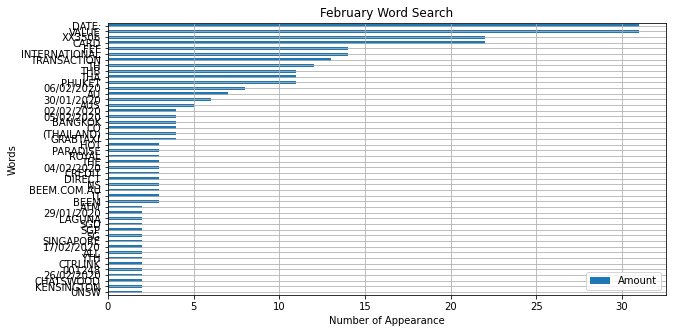

In [93]:
feb_words_search()

In [94]:
def feb_words_search_cleaned():
    febcleandf = pd.DataFrame({"Amount":feb_cleaned.values()}, index=feb_cleaned.keys())
    febcleandf.plot(kind='barh').set(xlabel="Number of Appearance", ylabel="Words",title = "February Word Search (Cleaned)")
    plt.grid(True)

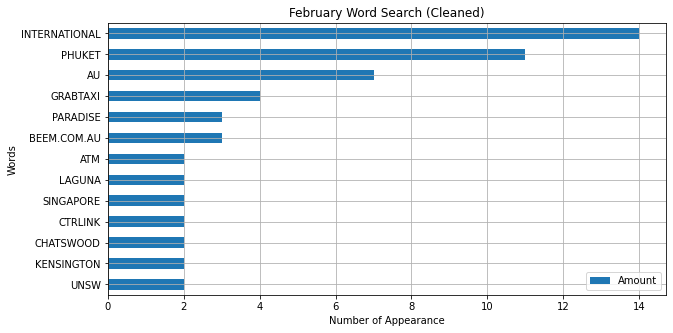

In [95]:
feb_words_search_cleaned()

In [96]:
def oversea_feb():
    phuketfeb = money_feb[["PHUKET" in x.upper() for x in money_feb.Transaction]]
    phuketfeb.set_index("Date").Debit.abs().plot(style='.-', xlabel="Date", ylabel="AUD($)",title= "Money Spend Oversea on Feb")

    feefeb = money_feb[["INTERNATIONAL" in x.upper() for x in money_feb.Transaction]]
    feefeb.set_index("Date").Debit.abs().plot(style='.-')


    taxifeb = money_feb[["GRABTAXI" in x.upper() for x in money_feb.Transaction]]
    taxifeb.set_index("Date").Debit.abs().plot(style='.-')


    plt.legend(["Phuket","International Transaction Fee", "TAXI at Thailand"])
    plt.grid(True)

# 3.1 Oh yeah! I went oversea!

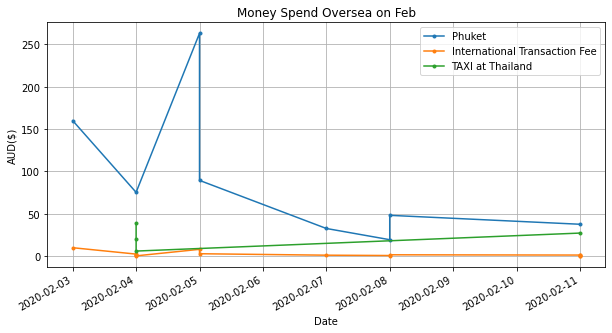

In [97]:
oversea_feb()

In [103]:

phuketdf = where_money[["PHUKET" in x.upper() for x in where_money.Transaction]]

ph_sum = phuketdf.Debit.abs().sum()

feedf = where_money[["TRANSACTION" in x.upper() for x in where_money.Transaction]]

fees_sum = feedf.Debit.abs().sum()

taxidf = where_money[["GRABTAXI" in x.upper() for x in where_money.Transaction]]

taxis_sum = taxidf.Debit.abs().sum()

SGdf = where_money[["SINGAPORE" in x.upper() for x in where_money.Transaction]]

sg_sum = SGdf.Debit.abs().sum()

bkdf = where_money[["ATM TERMINAL 21" in x.upper() for x in where_money.Transaction]]

bk_sum = taxidf.Debit.abs().sum()

def money_oversea_jan_feb():
    phuketdf.set_index("Date").Debit.abs().plot(style='.-', xlabel="Date", ylabel="AUD($)",title= "Money Spend Oversea Jan-Feb")
    feedf.set_index("Date").Debit.abs().plot(style='.-')
    taxidf.set_index("Date").Debit.abs().plot(style='.-')
    SGdf.set_index("Date").Debit.abs().plot(style='.-')
    bkdf.set_index("Date").Debit.abs().plot(style='.-')
    plt.legend(["Phuket","International Transaction Fee", "TAXI","SINGAPORE","Bangkok"])
    plt.grid(True)

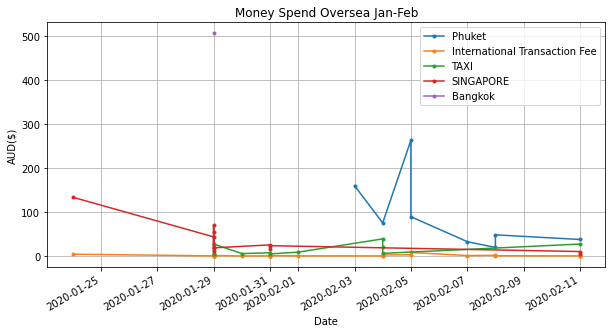

In [104]:
money_oversea_jan_feb()

In [105]:
date_phuket = phuketdf.Date.tolist()
date_phuket.reverse()

date_fee =feedf.Date.tolist()
date_fee.reverse()

date_taxi =taxidf.Date.tolist()
date_taxi.reverse()

date_SG =SGdf.Date.tolist()
date_SG.reverse()

date_bk =bkdf.Date.tolist()
date_bk.reverse()

In [106]:
this_list = phuketdf.Debit.abs().tolist()
list2sum = list_reverer()
phuket_sum = sum_function()

labels_ph = date_phuket
data_ph = phuket_sum

this_list = feedf.Debit.abs().tolist()
list2sum = list_reverer()
fee_sum = sum_function()

labels_fee = date_fee
data_fee = fee_sum

this_list = taxidf.Debit.abs().tolist()
list2sum = list_reverer()
taxi_sum = sum_function()

labels_taxi = date_taxi
data_taxi = taxi_sum

this_list = SGdf.Debit.abs().tolist()
list2sum = list_reverer()
singapore_sum = sum_function()

labels_SG = date_SG
data_SG = singapore_sum

this_list = bkdf.Debit.abs().tolist()
list2sum = list_reverer()
bangkok_sum = sum_function()

labels_bk = date_bk
data_bk = bangkok_sum
def sum_money_oversea():
    df_ph = pd.DataFrame({'Phuket':data_ph}, index=labels_ph)
    ax_ph = df_ph.plot(style = ".-")

    df_fee = pd.DataFrame({'Fee':data_fee}, index=labels_fee)
    ax_fee = df_fee.plot(ax=ax_ph, style = ".-")

    df_taxi = pd.DataFrame({'Taxi':data_taxi}, index=labels_taxi)
    ax_taxi = df_taxi.plot(ax=ax_ph, style = ".-")

    df_sg = pd.DataFrame({'Singapore':data_SG}, index=labels_SG)
    ax_sg = df_sg.plot(ax=ax_ph, style = ".-")

    df_bk = pd.DataFrame({'Bangkok':data_bk}, index=labels_bk)
    ax_bk = df_bk.plot(ax=ax_ph, style = ".-")

    ax_ph.set(xlabel="Date", ylabel="AUD($)", title= "Sum of money spend oversea")
    plt.grid(True)


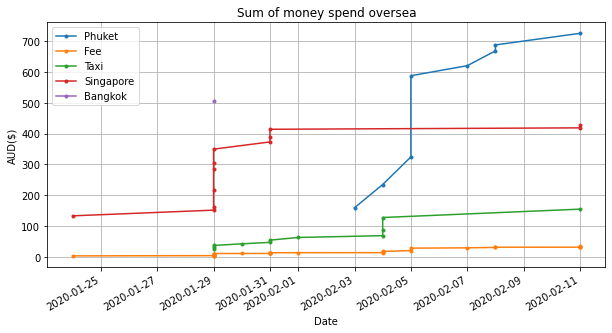

In [107]:
sum_money_oversea()

In [108]:
flight_sum = where_money[["FLIGHT" in x.upper() for x in where_money.Transaction]].Debit.abs().sum()
booking_sum = where_money[["EXPEDIA.COM" in x.upper() for x in where_money.Transaction]].Debit.abs().sum()

In [109]:
travel_sum=ph_sum+ fees_sum+ taxis_sum+sg_sum+ bk_sum+ flight_sum+ booking_sum


In [110]:
def money_trip():
    pie_oversea_df = pd.DataFrame({'Total($)': [ph_sum, fees_sum, taxis_sum, sg_sum, bk_sum, flight_sum, booking_sum]}, index=["Phuket","International Transaction Fee", "TAXI","SINGAPORE","Bangkok","Flight","Accommodation"])
    ax = pie_oversea_df.plot.pie(y='Total($)', figsize=(10, 10)).set(title = "Ratio of Money Spend on The Trip")
    fig = plt.figure()
    fig.patch.set_facecolor('white')

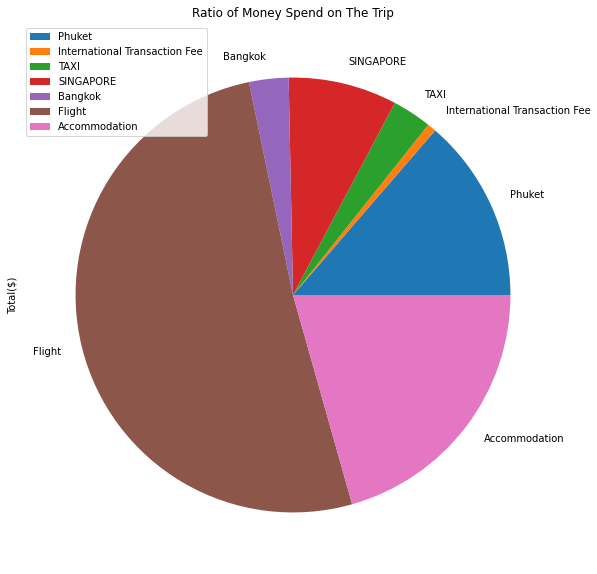

<Figure size 720x360 with 0 Axes>

In [111]:
money_trip()

In [115]:

money_19_oct = where_money[(where_money.Date > '2019-10') & (where_money.Date < '2019-11')]
def money_2019_10():
    oct_19 = money_19_oct.set_index("Date").groupby(pd.Grouper(freq="1D")).sum()
    oct_19_debit = oct_19.Debit.abs()
    oct_19_credit = oct_19.Credit
    oct_19_index = oct_19.index

    oct_19_plt = pd.DataFrame({'Debit': oct_19_debit}, index = oct_19_index)
    ax_oct = oct_19_plt.plot(style = ".-", xlabel="Date(2019/10)", ylabel="AUD($)", title= "Money spend per day (2019/10)")
    plt.xticks(oct_19.index, oct_19.index, rotation=0)

    oct_19_plt2 = pd.DataFrame({'Credit': oct_19_credit}, index = oct_19_index)
    ax_oct2 = oct_19_plt2.plot(ax=ax_oct,style = ".-")
    plt.xticks(oct_19.index, oct_19.index, rotation=0)

    date_form = mdates.DateFormatter("%d")
    ax_oct.xaxis.set_major_formatter(date_form)
    plt.grid(True)

# 4. Dive into the deeds (again)

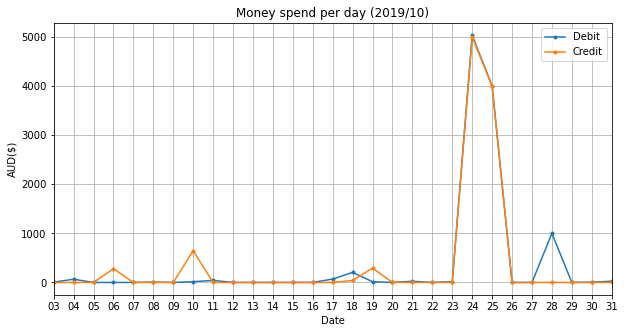

In [116]:
money_2019_10()

In [117]:
money_19_oct[(money_19_oct.Date > '2019-10-22') & (money_19_oct.Date < '2019-10-27')]

,Date,Credit,Debit,Transaction,Balance
921,2019-10-25,NaN,-4000.00,Transfer to other Bank CommBank app stonk,1750.44
922,2019-10-25,4000.0,NaN,Transfer from xx9392 CommBank app,5750.44
923,2019-10-24,NaN,-5000.00,Transfer to xx9392 CommBank app,1750.44
924,2019-10-24,NaN,-10.00,Transfer to other Bank CommBank app test,6750.44
925,2019-10-24,5000.0,NaN,Transfer from xx9392 CommBank app,6760.44
926,2019-10-24,NaN,-17.00,PAYPAL *STAN 4029357733 AU AUS Card xx3506 Val...,1760.44
927,2019-10-24,NaN,-6.50,HJ CHATSWOOD PTY LTD CHATSWOOD NS AUS Card xx3...,1777.44
928,2019-10-23,NaN,-4.00,Hungry Jacks WoolloomoolooAU,1783.94
929,2019-10-23,NaN,-11.08,SMP*Makanai Chatwsood Chatswood AU AUS Card xx...,1787.94


In [118]:

money_19_oct_Trans = money_19_oct.Transaction.str.upper()
money_19oct_nostonk = money_19_oct[~money_19_oct_Trans.str.contains("STONK")]
money_19oct_notran = money_19oct_nostonk[~money_19_oct_Trans.str.contains("XX9392")]
def money_2019_10_clean():
    ntoct19 = money_19oct_notran.set_index("Date").groupby(pd.Grouper(freq="1D")).sum()
    ntoct19_debit = ntoct19.Debit.abs()
    ntoct19_credit = ntoct19.Credit
    ntoct19_index = ntoct19.index

    ntoct19_plt = pd.DataFrame({'Debit': ntoct19_debit}, index = ntoct19_index)
    ax_oct19 = ntoct19_plt.plot(style = ".-", xlabel="Date(2019/10)", ylabel="AUD($)", title= "Money spend per day (2019/10)")
    plt.xticks(ntoct19.index, ntoct19.index, rotation=0)

    ntoct19_plt2 = pd.DataFrame({'Credit': ntoct19_credit}, index = ntoct19_index)
    ax_oct192 = ntoct19_plt2.plot(ax=ax_oct19,style = ".-")
    plt.xticks(ntoct19.index, ntoct19.index, rotation=0)

    date_form = mdates.DateFormatter("%d")
    ax_oct19.xaxis.set_major_formatter(date_form)
    plt.grid(True)

<ipython-input-118-eb8de045a4ab>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  money_19oct_notran = money_19oct_nostonk[~money_19_oct_Trans.str.contains("XX9392")]


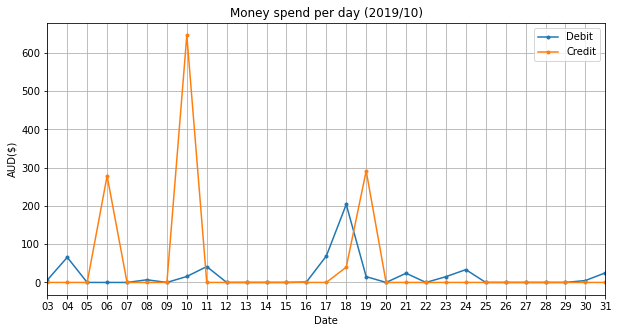

In [119]:
money_2019_10_clean()

In [120]:
money_19oct_notran[(money_19oct_notran.Date == '2019-10-06')]

,Date,Credit,Debit,Transaction,Balance
943,2019-10-06,278.63,NaN,Direct Credit 001248 CTRLINK YTH ALL 7E1S25942...,1198.79


In [121]:
money_19oct_notran[(money_19oct_notran.Date == '2019-10-10')]

,Date,Credit,Debit,Transaction,Balance
940,2019-10-10,645.96,NaN,Transfer From SIGNATURE ORTHOPAEDICS PTY Wages,1822.16
941,2019-10-10,NaN,-15.6,SSC DESSERT PTY LTD ROUSE HILL NS AUS Card xx3...,1176.20


In [122]:
money_19oct_notran[(money_19oct_notran.Date == '2019-10-19')]

,Date,Credit,Debit,Transaction,Balance
931,2019-10-19,13.00,NaN,Transfer From SABRINA C PIRO DragonTesticlesZ,1823.02
932,2019-10-19,NaN,-15.17,DOYLESPYRMONT Pyrmont NS AUS Card xx3506 Value...,1810.02
933,2019-10-19,278.63,NaN,Direct Credit 001248 CTRLINK YTH ALL 7E1S29742...,1825.19


# 4.1 I had jobs???

In [126]:
unswpay = where_money[["SALARY UNSW" in x.upper() for x in where_money.Transaction]]
sopay = where_money[["SIGNATURE " in x.upper() for x in where_money.Transaction]]
ctrlinkpay = where_money[["CTRLINK" in x.upper() for x in where_money.Transaction]]
def incomes():
    
    unswpay.set_index("Date").Credit.abs().plot(style='.-', xlabel="Date", ylabel="AUD($)",title= "Income($)")

    
    sopay.set_index("Date").Credit.abs().plot(style='.-')


    
    ctrlinkpay.set_index("Date").Credit.abs().plot(style='.-')


    plt.legend(["UNSW","Signature Orthopaedics", "Centerlink"])
    plt.grid(True)

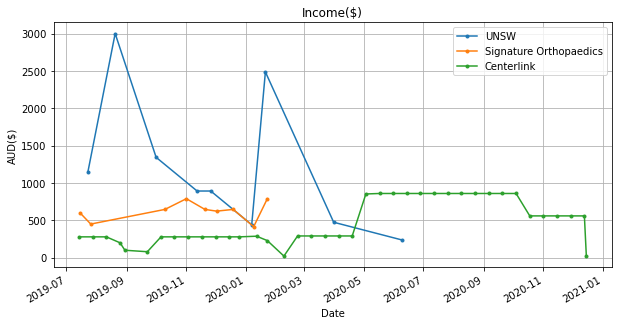

In [127]:
incomes()

In [128]:
date_unsw = unswpay.Date.tolist()
date_unsw.reverse()

date_so =sopay.Date.tolist()
date_so.reverse()

date_crtl =ctrlinkpay.Date.tolist()
date_crtl.reverse()


In [129]:
this_list = unswpay.Credit.abs().tolist()
list2sum = list_reverer()
unsw_sum = sum_function()

labels_unsw = date_unsw
data_unsw = unsw_sum


this_list = sopay.Credit.abs().tolist()
list2sum = list_reverer()
so_sum = sum_function()

labels_so = date_so
data_so = so_sum


this_list = ctrlinkpay.Credit.abs().tolist()
list2sum = list_reverer()
crtl_sum = sum_function()

labels_crtl = date_crtl
data_crtl = crtl_sum

def sum_income():
    df_unsw = pd.DataFrame({'UNSW - $10909':data_unsw}, index=labels_unsw)
    ax_unsw = df_unsw.plot(style = ".-")

    df_so = pd.DataFrame({'Signature Orthopaedics - $5604':data_so}, index=labels_so)
    ax_so = df_so.plot(ax=ax_unsw, style = ".-")

    df_crtl = pd.DataFrame({'Centerlink - $18277':data_crtl}, index=labels_crtl)
    ax_crtl = df_crtl.plot(ax=ax_unsw, style = ".-")


    ax_unsw.set(xlabel="Date", ylabel="AUD($)", title= "Sum of income($)")
    plt.grid(True)


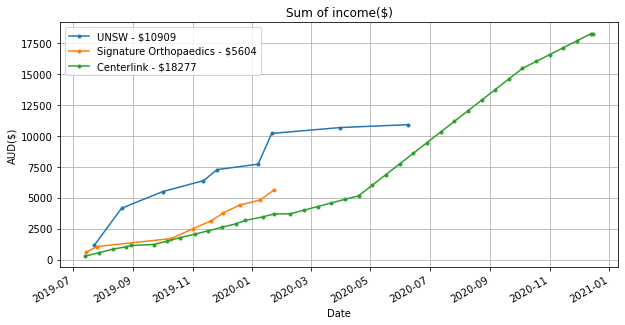

In [130]:
sum_income()

In [131]:
work_sum = 10909 + 5604
sum_crtl = 18277


In [142]:
Trandf = where_money[["TO XX9392" in x.upper() for x in where_money.Transaction]]
takedf = where_money[["FROM XX9392" in x.upper() for x in where_money.Transaction]]
trandf_sum = Trandf.Debit.abs().sum()
takedf_sum = takedf.Credit.sum()
def self_transfer():
    
    Trandf.set_index("Date").Debit.abs().plot(style='.-')
    

    
    takedf.set_index("Date").Credit.plot(style='.-').set(xlabel="Date", ylabel="Amount of money ($)", title = "Transfer to saving and spending account")
    

    plt.legend(["Transfer to Saving", "Transfer to Spending"])
    plt.grid(True)

# 4.2 Where is the rest of my money coming from??

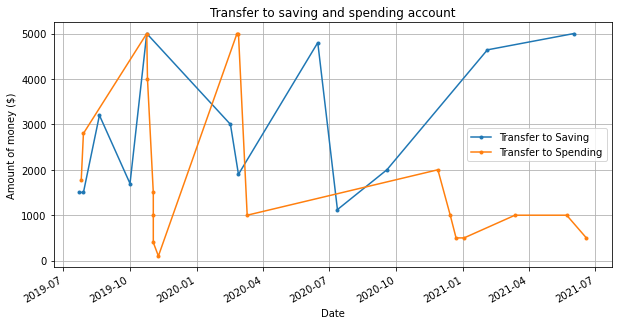

In [143]:
self_transfer()

In [144]:
date_trans = Trandf.Date.tolist()
date_trans.reverse()

date_take =takedf.Date.tolist()
date_take.reverse()

In [145]:
this_list = Trandf.Debit.abs().tolist()
list2sum = list_reverer()
tran_sum = sum_function()

labels = date_trans
data = tran_sum

this_list = takedf.Credit.tolist()
list2sum = list_reverer()
take_sum = sum_function()

labels_take = date_take
data_take = take_sum
def self_transfer_sum():
    df = pd.DataFrame({'Saving':data}, index=labels)
    ax = df.plot(rot=0, style = ".-")

    df_2 = pd.DataFrame({'Take':data_take}, index=labels_take)
    ax_2 = df_2.plot(ax=ax, style = ".-")

    ax.set(xlabel="Area", ylabel="AUD($)", title = "where my money is going")
    plt.grid(True)

    max_take = df_2.idxmax() #.idxmax
    bye = 34078.34
    plt.annotate(f"${bye} Took", (max_take, bye))
    max_save = df.idxmax() #.idxmax
    hi = 35365.38
    plt.annotate(f"${hi} Save", (max_save, hi))

    print(f"Sum of saving = ${trandf_sum}")
    print(f"Sum taken from saving = ${takedf_sum}")
    actual_sum = Trandf.Debit.abs().sum() - takedf.Credit.sum() 
    print(f"Actual saving = ${int(actual_sum)}")

Sum of saving = $35365.38
Sum taken from saving = $34078.34
Actual saving = $1287


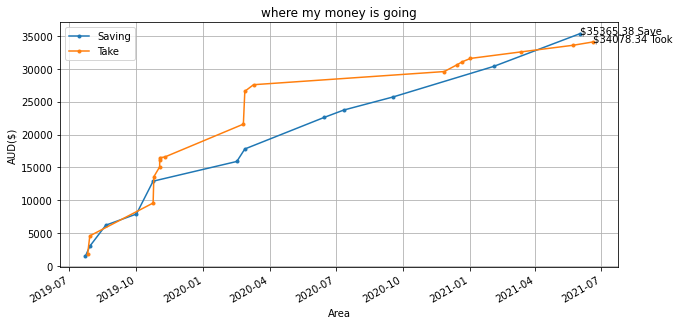

In [146]:
self_transfer_sum()

In [147]:
othercredupper = where_money.Transaction.str.upper()
othercred = where_money[~othercredupper.str.contains("FROM XX9392")]

othercredupper2 = othercred.Transaction.str.upper()
wherecred = othercred[othercredupper2.str.contains("TRANSFER FROM|REFUND")]


In [148]:
othercred_words = Counter()
othercred_count = wherecred.Transaction.str.upper().str.split().apply(othercred_words.update)
print(othercred_words)

Counter({'BEEM': 66, 'REFUND': 65, 'PURCHASE': 65, 'IT': 65, 'FROM': 59, 'TRANSFER': 58, 'BEEM.COM.AU': 46, 'AU': 46, 'COMMBANK': 22, 'APP': 22, 'FOOD': 12, 'GENEVIEVE': 11, 'LAM': 11, 'DENNIS': 9, 'LO': 9, 'MISS': 9, 'ANTONIA': 8, 'JESSLYN': 8, 'LIU': 8, 'SIGNATURE': 7, 'ORTHOPAEDICS': 7, 'PTY': 7, 'WAGES': 7, 'LAI': 5, 'YAN': 5, 'NETBANK': 5, 'FM': 5, 'MUM': 5, 'VALUE': 4, 'DATE:': 4, 'DINNER': 4, 'FOR': 3, 'SABRINA': 3, 'C': 3, 'PIRO': 3, 'FOODZ': 3, '26/05/2021': 2, 'SAMANTHA': 2, 'YEUNG': 2, 'JAM': 2, 'DAY': 2, 'JACQUELINE': 2, 'SZE': 2, 'TING': 2, 'LEUNG': 2, 'YUMCHA': 2, 'LUKE': 1, 'SU': 1, 'THAI': 1, 'SWEE': 1, 'KEN': 1, 'PANG': 1, 'TRIP': 1, '24TH': 1, 'KOREAN': 1, 'SEAN': 1, 'KRAUCHI': 1, 'FRIED': 1, 'CHICKEN': 1, 'FUEL': 1, 'WINEE': 1, 'MONEY': 1, 'EARRING': 1, '19/12/2020': 1, 'THE': 1, 'BEACH': 1, 'PETROL': 1, 'ESTHER': 1, 'GEN': 1, 'UNIQLO': 1, '+': 1, 'IKEA': 1, 'I': 1, 'THINK?': 1, 'SUNDAY': 1, 'ABBYS': 1, 'MOVIE': 1, 'PIZZA': 1, 'TENGES': 1, 'CLARA': 1, 'TICKETS': 1, '

In [149]:
wordstoclean = dict(othercred_words)
item = ('REFUND','PURCHASE','IT','FROM', 'TRANSFER','BEEM.COM.AU', 'AU', 'COMMBANK', 'APP', 'FOOD', 'LAM', 'LO','MISS','ANTONIA','LIU','SIGNATURE','ORTHOPAEDICS','PTY','WAGES','LAI','YAN','NETBANK','FM','VALUE','DATE:','DINNER','FOR','C','PIRO','FOODZ','26/05/2021','YEUNG','JAM','DAY','SZE','TING','LEUNG','YUMCHA','SU','THAI','SWEE','PANG','TRIP','24TH','KOREAN','KRAUCHI','FRIED','CHICKEN','FUEL','WINEE','MONEY','EARRING','19/12/2020','THE','BEACH','PETROL','GEN','UNIQLO','+','IKEA','I','THINK?','SUNDAY','ABBYS','MOVIE','PIZZA','TENGES','TICKETS','SEAFOOOOOD','CHEUK','CHI','HO','KAI','GALEA','CAD','AND','MATERIALS','YOO','SUCKS','29/02/2020','BBQ','DRAGONTESTICLESZ','CUM','IN','A','SHELL','JINGLUN','YU','SUGIMURA','CREDIT','TO','ACCOUNT','YERIKO','TENGE','JAC','N','SAM','DUMB','BISH','DU','CHACHING','MUM')
cred_cleaned = words_cleanup()
print(cred_cleaned)

{'BEEM': 66, 'SAMANTHA': 2, 'LUKE': 1, 'KEN': 1, 'GENEVIEVE': 11, 'DENNIS': 9, 'SEAN': 1, 'JESSLYN': 8, 'ESTHER': 1, 'JACQUELINE': 2, 'CLARA': 1, 'SABRINA': 3, 'YUKI': 1, 'SARAH': 1, 'JASON': 1, 'RAN': 1}


In [150]:
cred_cleaned_sort = {k: v for k, v in sorted(cred_cleaned.items(), key=lambda item: item[1])}
cred_cleaned_sort

{'LUKE': 1,
 'KEN': 1,
 'SEAN': 1,
 'ESTHER': 1,
 'CLARA': 1,
 'YUKI': 1,
 'SARAH': 1,
 'JASON': 1,
 'RAN': 1,
 'SAMANTHA': 2,
 'JACQUELINE': 2,
 'SABRINA': 3,
 'JESSLYN': 8,
 'DENNIS': 9,
 'GENEVIEVE': 11,
 'BEEM': 66}

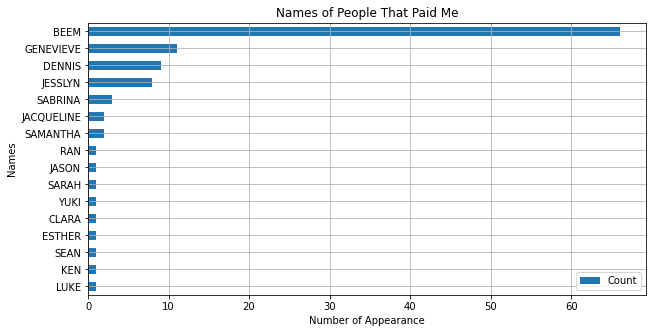

In [151]:
cred_cleaned_df = pd.DataFrame({"Count":cred_cleaned_sort.values()}, index=cred_cleaned_sort.keys())
cred_cleaned_df.plot(kind='barh').set(ylabel='Names', xlabel="Number of Appearance", title = "Names of People That Paid Me")
plt.grid(True)

In [152]:
nGENEVIEVE = othercred[othercredupper2.str.contains("GENEVIEVE")].Credit.sum()
nDENNIS = othercred[othercredupper2.str.contains("DENNIS")].Credit.sum()
nJESSLYN = othercred[othercredupper2.str.contains("JESSLYN")].Credit.sum()
nSABRINA = othercred[othercredupper2.str.contains("SABRINA")].Credit.sum()
nJACQUELINE = othercred[othercredupper2.str.contains("JACQUELINE")].Credit.sum()
nSAMANTHA = othercred[othercredupper2.str.contains("SAMANTHA")].Credit.sum()
nRAN = othercred[othercredupper2.str.contains("RAN DU")].Credit.sum()
nJASON = othercred[othercredupper2.str.contains("JASON")].Credit.sum()
nSARAH = othercred[othercredupper2.str.contains("SARAH")].Credit.sum()
nYUKI = othercred[othercredupper2.str.contains("YUKI")].Credit.sum()
nCLARA = othercred[othercredupper2.str.contains("CLARA")].Credit.sum()
nESTHER = othercred[othercredupper2.str.contains("ESTHER")].Credit.sum()
nSEAN = othercred[othercredupper2.str.contains("SEAN")].Credit.sum()
nKEN = othercred[othercredupper2.str.contains("KEN")].Credit.sum()
nLUKE = othercred[othercredupper2.str.contains("LUKE")].Credit.sum()
nJEREMY = where_money[othercredupper.str.contains("JEREMY")].Credit.sum()

In [153]:
total_name = nGENEVIEVE+nDENNIS+nJESSLYN+nSABRINA+nJACQUELINE+nSAMANTHA+nRAN+ nJASON+ nSARAH+ nYUKI+ nCLARA+ nESTHER+ nSEAN+nKEN+ nLUKE+nJEREMY
total_name

3418.45

In [154]:
def who_owned_the_most():
    pie_name_df = pd.DataFrame({'Total($)': [nGENEVIEVE, nDENNIS, nJESSLYN, nSABRINA, nJACQUELINE, nSAMANTHA,nRAN, nJASON, nSARAH, nYUKI, nCLARA, nESTHER, nSEAN,nKEN, nLUKE,nJEREMY]}, index=["GENEVIEVE", "DENNIS", "JESSLYN", "SABRINA", "JACQUELINE", "SAMANTHA","RAN", "JASON", "SARAH", "YUKI", "CLARA", "ESTHER", "SEAN","KEN", "LUKE","JEREMY"])
    ax = pie_name_df.plot.pie(y='Total($)', figsize=(10, 10)).set(title = "Who Owned Me The Most")
    fig = plt.figure()
    fig.patch.set_facecolor('white')

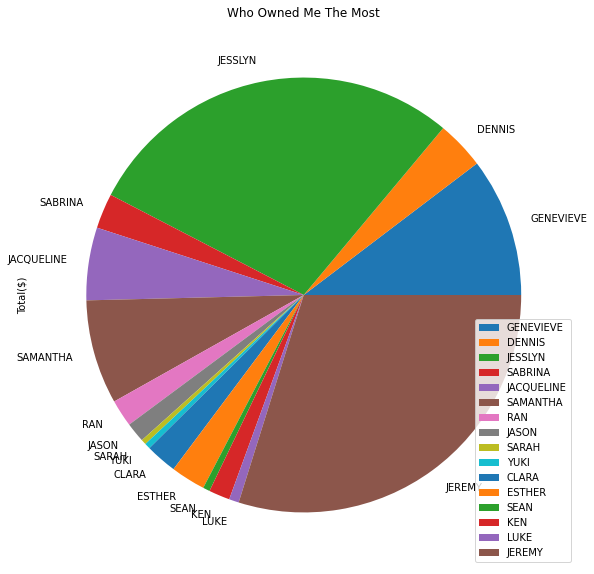

<Figure size 720x360 with 0 Axes>

In [155]:
who_owned_the_most()

In [166]:
beemdf = othercred[othercredupper2.str.contains("BEEM")]
beem_sum = beemdf.sum().Credit
def beem_payment():
    
    
    beemdf.set_index("Date").groupby(pd.Grouper(freq='D')).sum().Credit.plot().set(xlabel="Date", ylabel="Credit ($AUD) ",title = "Payment through Beem It")
    plt.grid(True)


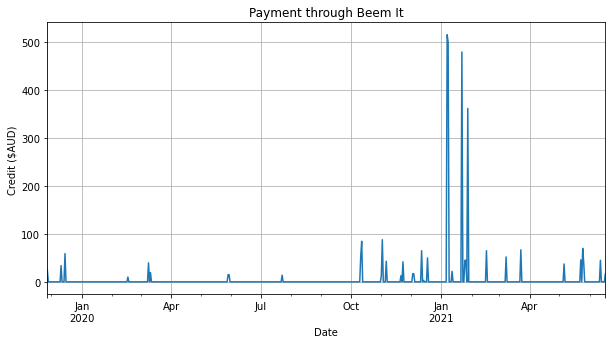

In [167]:
beem_payment()

[Text(0.5, 0, 'AUD ($)'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Payment through Beem It')]

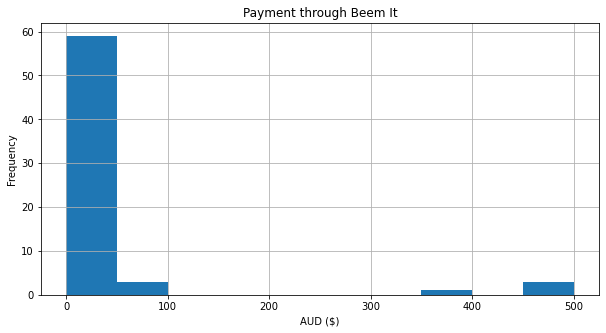

In [168]:
beemdf.Credit.hist().set(xlabel="AUD ($)", ylabel="Frequency",title = "Payment through Beem It")

In [169]:
def where_money_from():
    labels = ['Jobs', 'Centerlink','Saving','Friends','Friends(through Beem It)']
    data_credit = [work_sum, sum_crtl,takedf_sum, total_name, beem_sum]

    df = pd.DataFrame({'Credit':data_credit}, index=labels)
    ax = df.plot.bar(rot=0,color = 'orange')
    ax.set(xlabel="Area", ylabel="Credit ($)", title = "Where is My Money From")
    plt.grid(True)


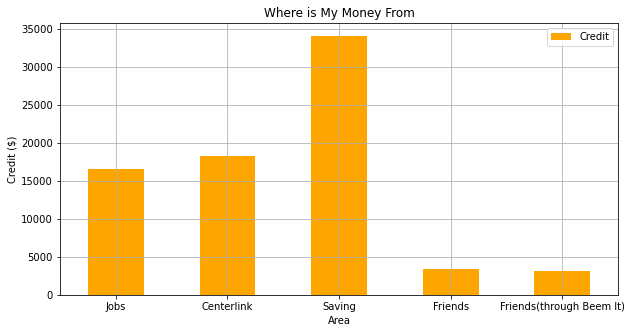

In [170]:
where_money_from()

# 5. Where is my money going?!

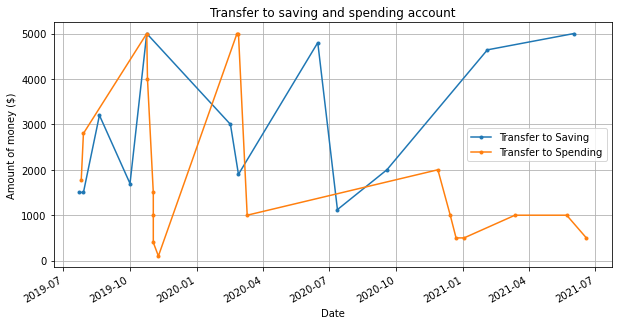

In [238]:
self_transfer()

In [171]:
trans5000 = where_money[(where_money.Date > '2019-10') & (where_money.Date < '2019-11') & ["TO XX9392" in x.upper() for x in where_money.Transaction]]
take5000 = where_money[(where_money.Date > '2019-10') & (where_money.Date < '2019-11') & ["FROM XX9392" in x.upper() for x in where_money.Transaction]]
print(trans5000)
print(take5000)


          Date  Credit   Debit                      Transaction  Balance
923 2019-10-24     NaN -5000.0  Transfer to xx9392 CommBank app  1750.44
          Date  Credit  Debit                        Transaction  Balance
922 2019-10-25  4000.0    NaN  Transfer from xx9392 CommBank app  5750.44
925 2019-10-24  5000.0    NaN  Transfer from xx9392 CommBank app  6760.44


In [172]:
where_money.iloc[920:930]

,Date,Credit,Debit,Transaction,Balance
920,2019-10-28,NaN,-1000.00,Transfer to other Bank CommBank app stonk,750.44
921,2019-10-25,NaN,-4000.00,Transfer to other Bank CommBank app stonk,1750.44
922,2019-10-25,4000.0,NaN,Transfer from xx9392 CommBank app,5750.44
923,2019-10-24,NaN,-5000.00,Transfer to xx9392 CommBank app,1750.44
924,2019-10-24,NaN,-10.00,Transfer to other Bank CommBank app test,6750.44
925,2019-10-24,5000.0,NaN,Transfer from xx9392 CommBank app,6760.44
926,2019-10-24,NaN,-17.00,PAYPAL *STAN 4029357733 AU AUS Card xx3506 Val...,1760.44
927,2019-10-24,NaN,-6.50,HJ CHATSWOOD PTY LTD CHATSWOOD NS AUS Card xx3...,1777.44
928,2019-10-23,NaN,-4.00,Hungry Jacks WoolloomoolooAU,1783.94
929,2019-10-23,NaN,-11.08,SMP*Makanai Chatwsood Chatswood AU AUS Card xx...,1787.94


In [200]:
stonkdf = where_money[["STONK" in x.upper() for x in where_money.Transaction]].set_index("Date")
stonk_sum = stonkdf.Debit.abs().sum()
def go_stonk():
    

    ax = stonkdf.groupby(pd.Grouper(freq='M')).sum().Debit.abs().plot().set(xlabel="Date", ylabel="Amount Invested ($)",title = "Moeny Put into Investment")
    
    print(f"Sum of stonk = ${int(stonk_sum)}")
    plt.grid(True)



Sum of stonk = $20500


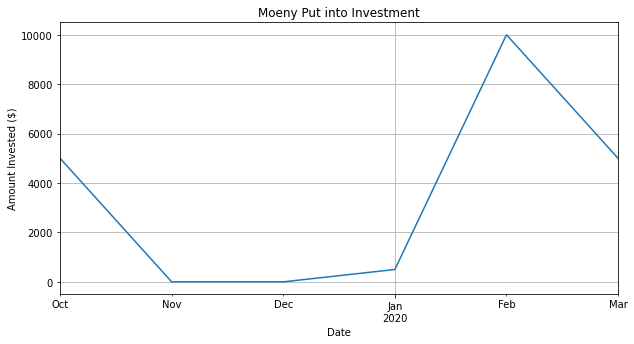

In [201]:
go_stonk()

In [216]:
eastwooddf = where_money[["EASTWOOD" in x.upper() for x in where_money.Transaction]]
eastwood_sum = eastwooddf.Debit.abs().sum()
def eastwood_spending():
    

    ax = eastwooddf.set_index("Date").groupby(pd.Grouper(freq='W')).sum().Debit.abs().plot().set(xlabel="Date", ylabel="Spending (AUD$)",title = "Spending At Eastwood per Week")
    
    len(eastwooddf.index)
    plt.grid(True)



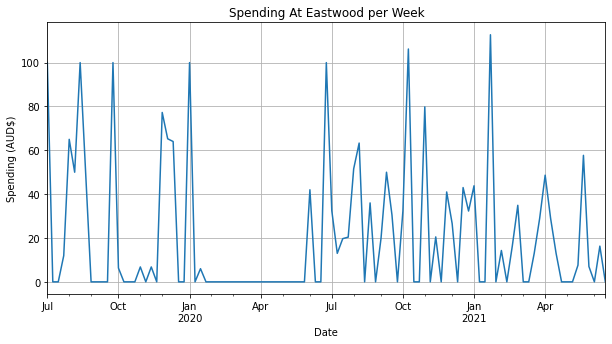

In [217]:
eastwood_spending()

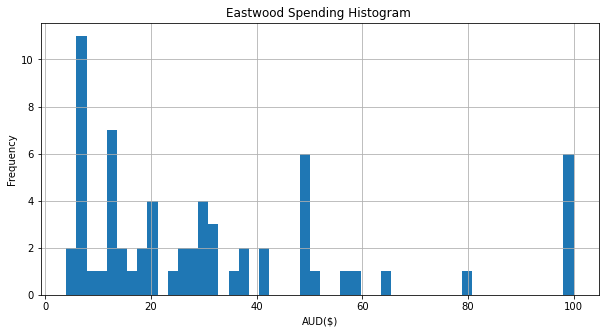

In [218]:
eastwooddf.Debit.abs().plot.hist(bins=50).set(xlabel="AUD($)", title = "Eastwood Spending Histogram ")
plt.grid(True)

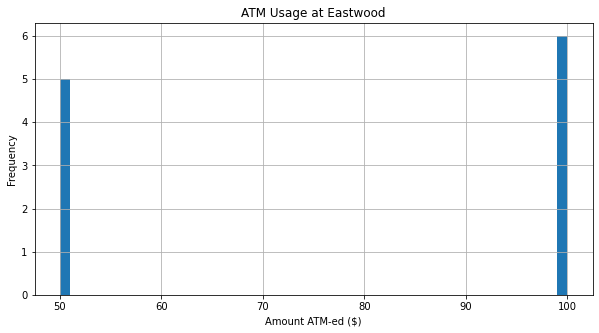

In [219]:
eastwooddf[["ATM" in x.upper() for x in eastwooddf.Transaction]].Debit.abs().plot.hist(bins=50).set(xlabel="Amount ATM-ed ($)", title = "ATM Usage at Eastwood")
plt.grid(True)

In [239]:
where_moneyupper = where_money.Transaction.str.upper()
unswdf = where_money[where_moneyupper.str.contains("UNSW|KENSINGTON")]
def uni_robbed_me():
    

    ax = unswdf.set_index("Date").groupby(pd.Grouper(freq='W')).sum().Debit.abs().plot(xlabel="Area", ylabel="Debit ($)", title = "Money spend at uni")
    len(unswdf.index)
    
    plt.grid(True)

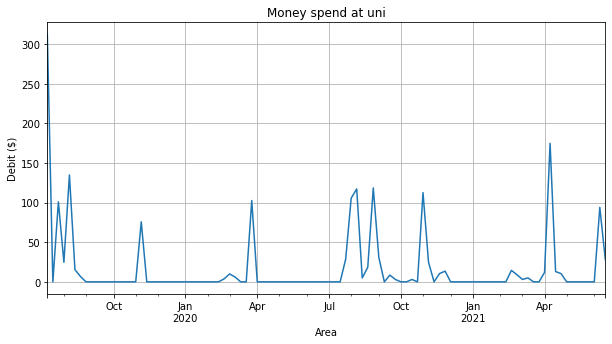

In [240]:
uni_robbed_me()

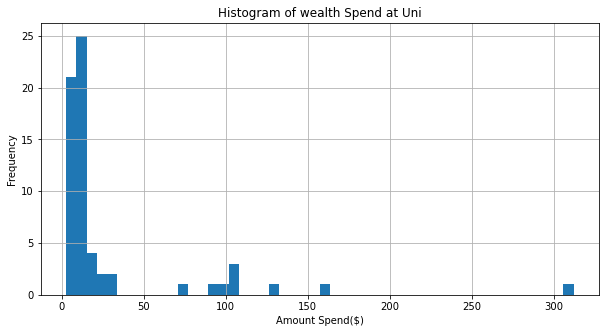

In [222]:
unswdf.Debit.abs().plot.hist(bins=50).set(xlabel="Amount Spend($)", title = "Histogram of wealth Spend at Uni")



In [231]:
udf = where_money[where_moneyupper.str.contains("UNSW LIBRARY|RANDWICK")]
unswfooddf = where_money[~where_moneyupper.str.contains("LIBRARY|RANDWICK")]
unswfooddf2 = unswfooddf[["UNSW" in x.upper() for x in unswfooddf.Transaction]]
unswlib_sum = udf.Debit.abs().sum()
unsw_food_sum = unswfooddf2.Debit.abs().sum()
def gg_money_uni():
    
    ax = udf.set_index("Date").groupby(pd.Grouper(freq='W')).sum().Debit.abs().plot(xlabel="Date", ylabel="Money Spend ($)", title = "Money Spend on Food vs Uni Works")
    
    ax2 = unswfooddf2.set_index("Date").groupby(pd.Grouper(freq='W')).sum().Debit.abs().plot(ax=ax)
    plt.legend(["UNSW Library", "Food Around UNSW"])
    plt.grid(True)
    

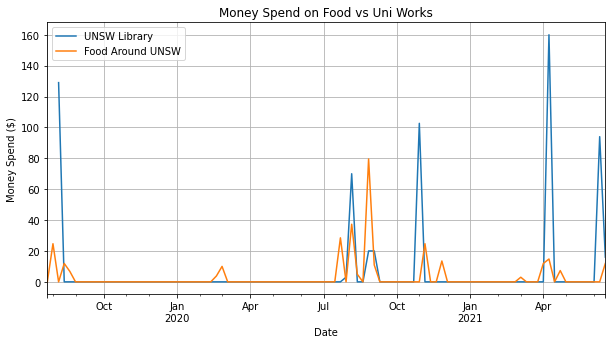

In [232]:
gg_money_uni()

In [233]:
def money_well_spend():
    where_money[["AMAZON" in x.upper() for x in where_money.Transaction]].set_index("Date").groupby(pd.Grouper(freq='W')).sum().Debit.abs().plot(xlabel="Date", ylabel="Money Spend on Amazon", title = "Amount of Money Spend on Amazon")
    plt.grid(True)

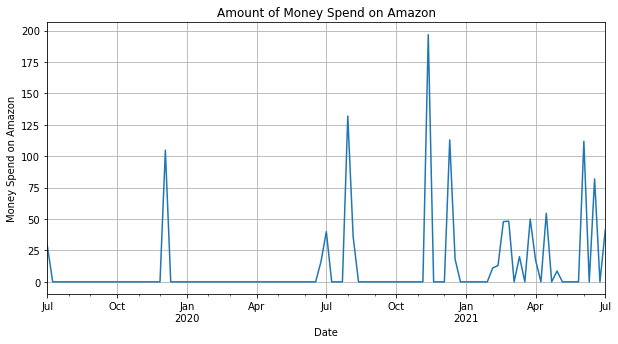

In [234]:
money_well_spend()

In [235]:
amazon_sum = where_money[["AMAZON" in x.upper() for x in where_money.Transaction]].Debit.abs().sum()

In [236]:
def sad_money():
    labels = ['Oversea','stonk', 'Saving','Eastwood','UNSW','Food around UNSW','Amazon']
    data_debit = [travel_sum,stonk_sum, trandf_sum, eastwood_sum,614.65,unsw_food_sum,amazon_sum]

    df = pd.DataFrame({'Debit':data_debit}, index=labels)
    ax = df.plot.bar(rot=0)
    ax.set(xlabel="Area", ylabel="Debit ($)", title = "where my money is going")
    plt.grid(True)



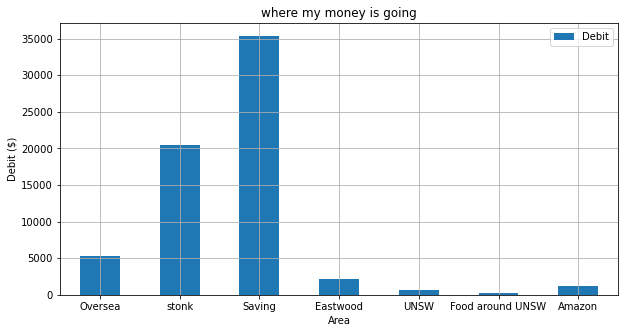

In [237]:
sad_money()